In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("2010.xlsx")

In [3]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2010,17774,376,31,3502
1,2010,17383,349,36,3542
2,2010,17558,123,38,3546
3,2010,17407,141,36,3497
4,2010,17344,136,22,3538
...,...,...,...,...,...
1797,2010,17430,378,32,3497
1798,2010,17167,111,24,3552
1799,2010,17988,201,27,3500
1800,2010,17661,382,41,3537


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1802, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1802 entries, 0 to 1801
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1802 non-null   int64
 1   Maximum length (m))  1802 non-null   int64
 2   Recession(m),        1802 non-null   int64
 3   Rate/yr(m)           1802 non-null   int64
 4   Snout altitude (m)   1802 non-null   int64
dtypes: int64(5)
memory usage: 70.5 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1802


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,2010,17774,376,31,3502
1,2010,17383,349,36,3542
2,2010,17558,123,38,3546
3,2010,17407,141,36,3497
4,2010,17344,136,22,3538


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0150,0.0208,-0.0099
"Recession(m),",NaN,-0.0150,1.0000,-0.0008,0.0003
Rate/yr(m),NaN,0.0208,-0.0008,1.0000,-0.0201
Snout altitude (m),NaN,-0.0099,0.0003,-0.0201,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)             0.0208
Snout altitude (m)    -0.0099
Recession(m),         -0.0150
Year                      NaN
Name: Maximum length (m)), dtype: float64

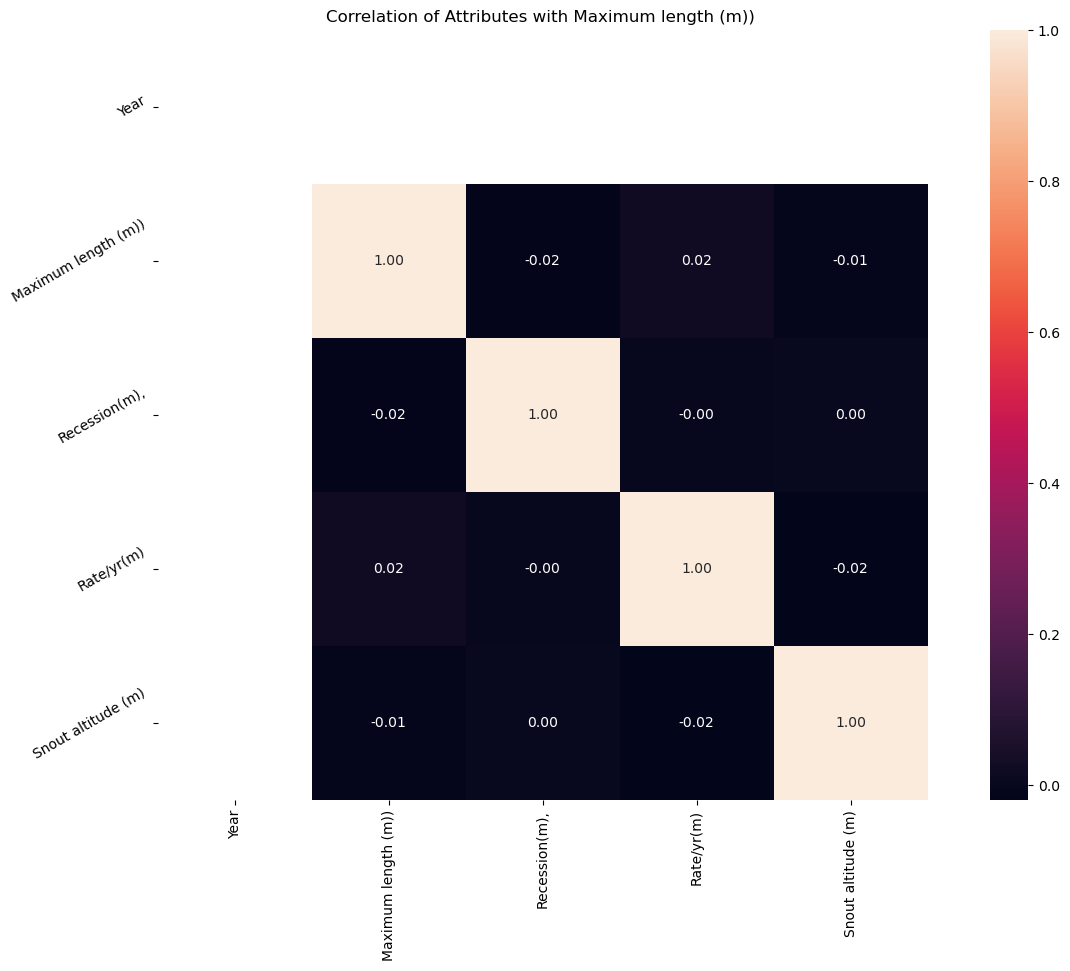

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,802.0000","1,802.0000","1,802.0000","1,802.0000","1,802.0000"
mean,"2,010.0000","17,540.3446",218.3868,27.7642,"3,531.9134"
std,0.0000,297.5780,129.3405,8.6030,20.9257
min,"2,010.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"2,010.0000","17,287.0000",106.2500,21.0000,"3,513.0000"
50%,"2,010.0000","17,529.0000",216.0000,28.0000,"3,532.0000"
75%,"2,010.0000","17,805.0000",331.0000,35.0000,"3,551.0000"
max,"2,010.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

2010   1.0000
Name: Year, dtype: float64

429   0.0061
102   0.0055
4     0.0055
219   0.0050
279   0.0050
       ...  
106   0.0006
32    0.0006
406   0.0006
330   0.0006
251   0.0006
Name: Recession(m),, Length: 439, dtype: float64

29   0.0427
41   0.0411
24   0.0400
36   0.0394
31   0.0388
22   0.0388
14   0.0377
27   0.0377
37   0.0372
26   0.0372
42   0.0350
15   0.0339
33   0.0339
34   0.0339
32   0.0327
23   0.0316
13   0.0316
18   0.0311
35   0.0311
40   0.0311
38   0.0311
25   0.0300
19   0.0300
21   0.0289
28   0.0289
30   0.0277
20   0.0272
16   0.0272
17   0.0266
39   0.0261
Name: Rate/yr(m), dtype: float64

3513   0.0211
3514   0.0189
3566   0.0189
3567   0.0183
3519   0.0183
        ...  
3500   0.0100
3550   0.0094
3524   0.0094
3520   0.0078
3496   0.0028
Name: Snout altitude (m), Length: 72, dtype: float64



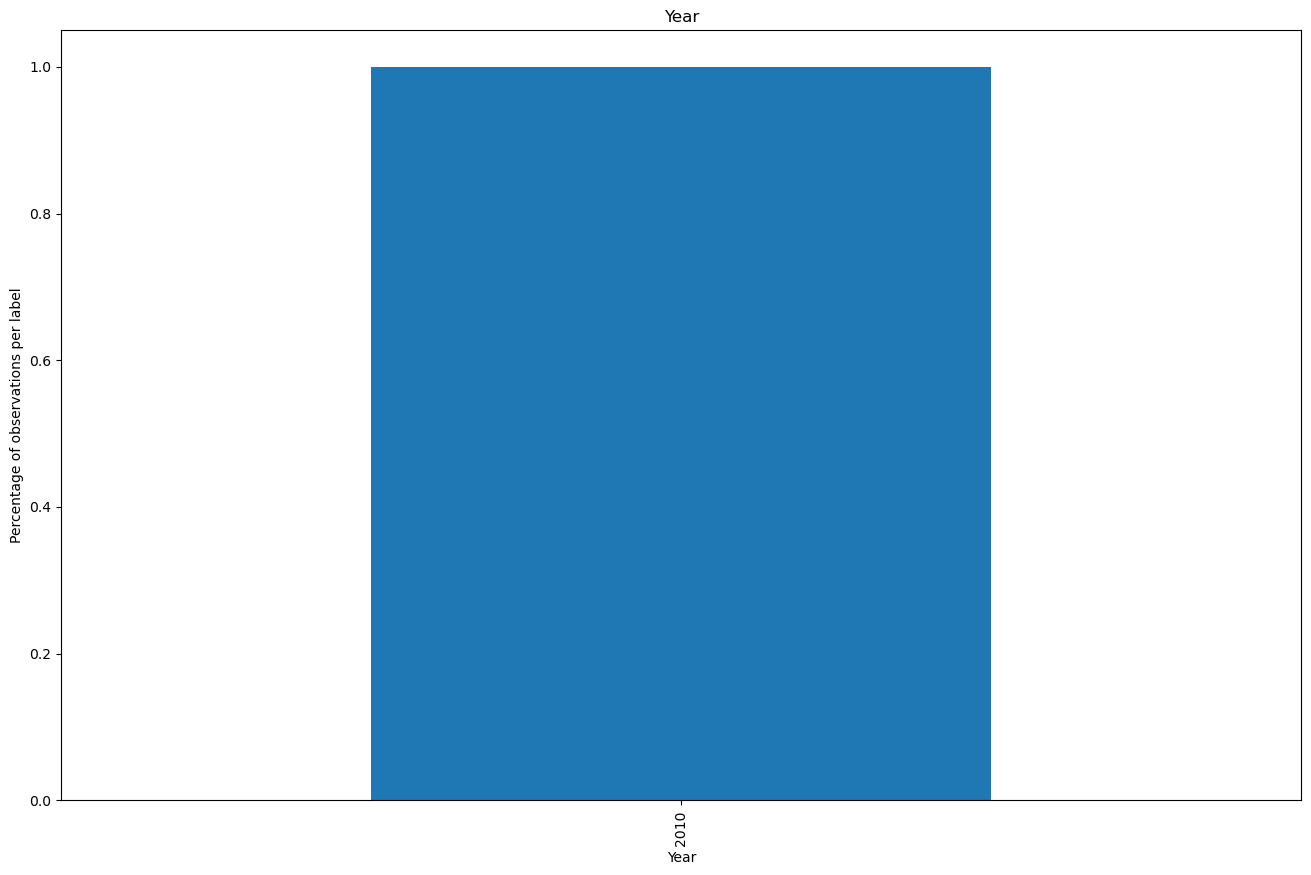

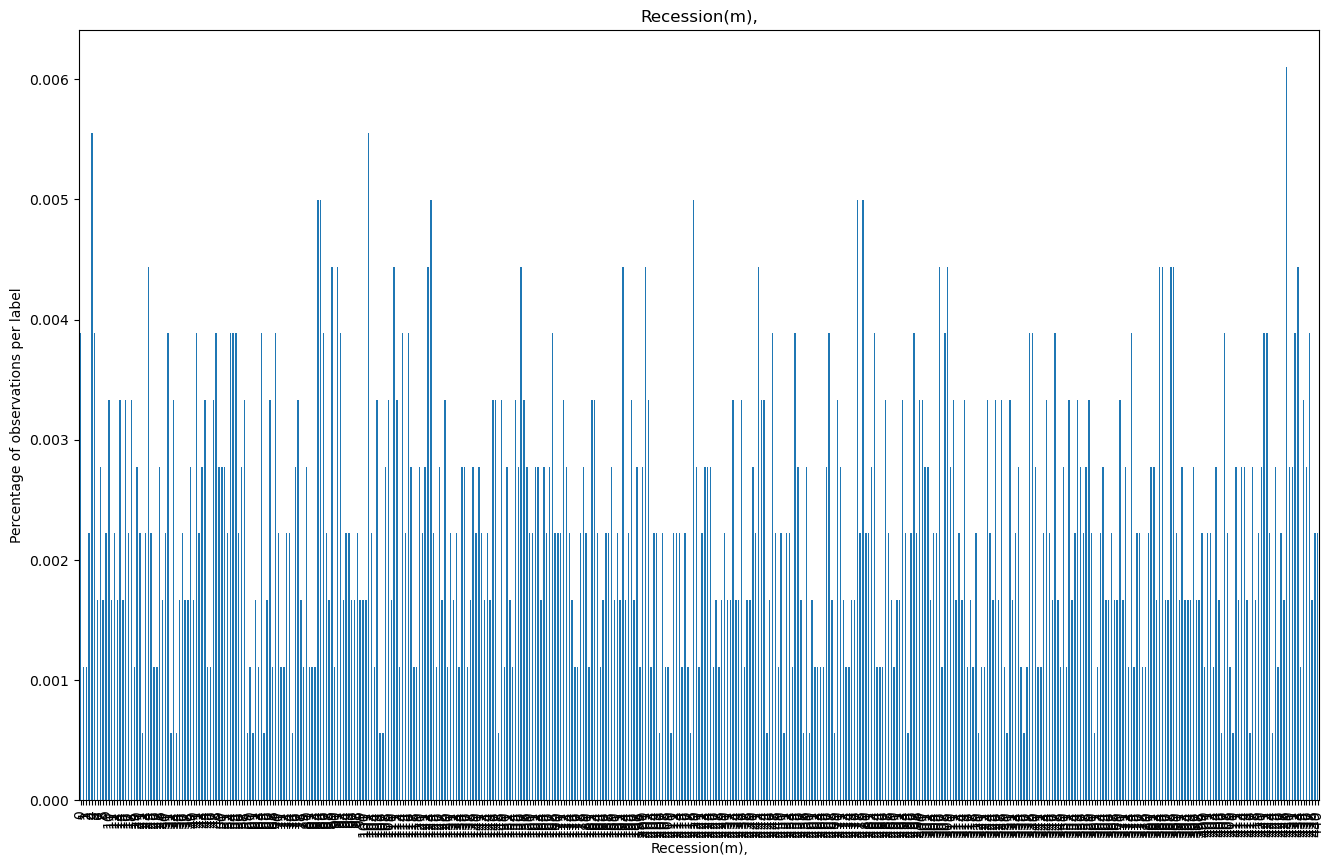

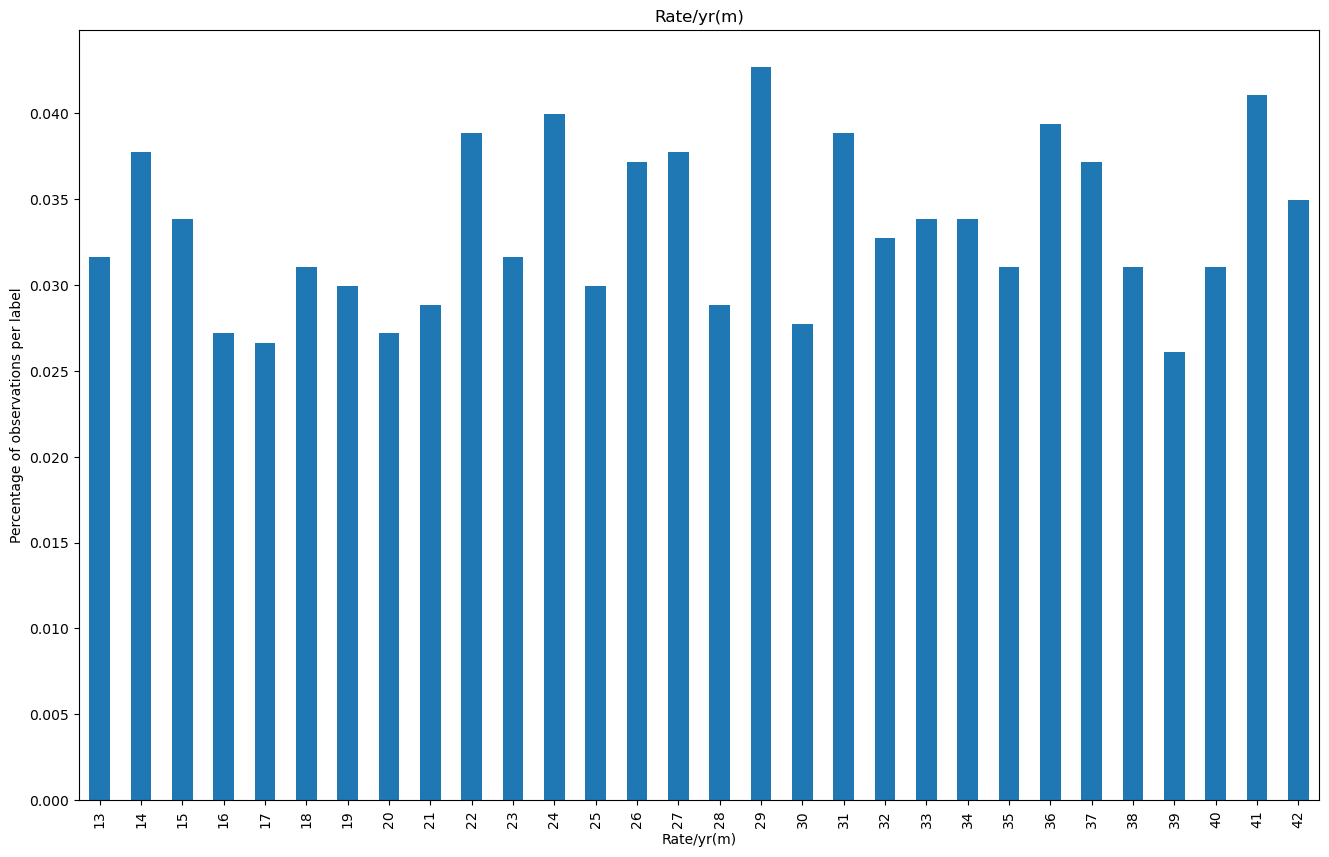

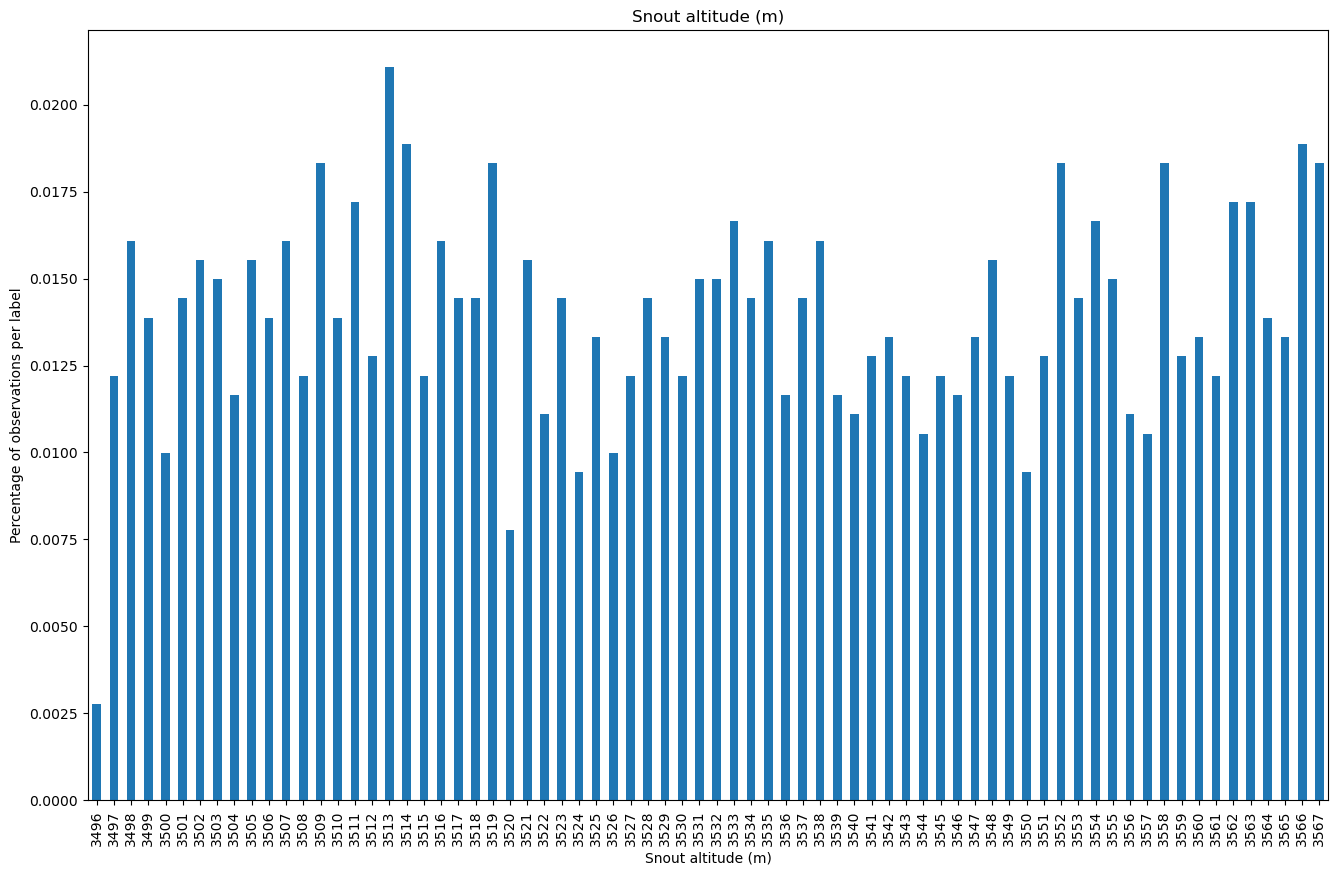

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()